<strong><b><font size="5">Data Science Academy</font></b></strong>

<strong><b><font size="5">Análise Estatística e Modelagem Preditiva de Séries Temporais - Em Python</font></b></strong>

<strong><b><font size="5">Aula 4 – Séries Multiplicativas, Aditivas e Decomposição de Séries Temporais</font></b></strong>

Todas as aulas deste curso podem ser encontradas na timeline da Comunidade em nosso portal: www.datascienceacademy.com.br

Vamos começar as aulas práticas sobre análise e modelagem de séries temporais. Nossa primeira tarefa será decompor uma série temporal e identificar seus componentes, conforme definimos nas primeiras aulas o curso.

Primeiro, uma rápida revisão:

## Séries Temporais

- Uma série temporal é um conjunto sequencial de pontos de dados, medido tipicamente em tempos sucessivos.

- É matematicamente definido como um conjunto de vetores x(t), t = 0,1,2, ... onde t representa o tempo decorrido.

- A variável x(t) é tratada como uma variável aleatória.

- As medições realizadas durante um evento em uma série temporal são organizadas em uma ordem cronológica adequada.

- Uma série temporal contendo registros de uma única variável é denominada como univariada e mais de uma variável como multivariada.

### Análise Exploratória

Uma análise exploratória dos dados permite compreender como os dados estão organizados.

In [0]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook, se necessário.

In [0]:
# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
!pip install -q -U watermark

In [0]:
# As novas versões do Pandas e Matplotlib trazem diversas mensagens de aviso ao desenvolvedor. Vamos desativar isso.
import sys
import warnings
import matplotlib.cbook
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

# Imports para manipulação de dados
import pandas as pd
import numpy as np

# Imports para visualização de dados
import matplotlib.pyplot as plt
import matplotlib as m
import seaborn as sns

# Imports análise e modelagem de séries temporais
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

# Formatando as saídas dos gráficos
plt.style.use('fivethirtyeight')
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
m.rcParams['axes.labelsize'] = 14
m.rcParams['xtick.labelsize'] = 12
m.rcParams['ytick.labelsize'] = 12
m.rcParams['text.color'] = 'k'

In [0]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy" --iversions

pandas          0.25.3
matplotlib      3.2.0
numpy           1.18.2
seaborn         0.10.0
statsmodels.api 0.10.2
Data Science Academy


Vamos carregar um dataset com uma série temporal.

O dataset é público e pode ser encontrado aqui:

https://www.kaggle.com/rakannimer/air-passengers

O conjunto de dados AirPassenger fornece totais mensais de passageiros de uma companhia aérea dos EUA, de 1949 a 1960. Esse conjunto de dados já é de uma classe de série temporal, portanto, nenhuma manipulação adicional de classe ou data é necessária.

In [0]:
# Carrega os dados
dados = pd.read_csv('https://raw.githubusercontent.com/dsacademybr/Datasets/master/dataset1.csv', header = None)

In [0]:
# Visualizando os Dados
dados.head()

,0,1
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


Perceba que são duas colunas. Esses dados representam uma série univariada, pois temos uma variável aleatória x (número de passageiros) e a data, que representa o índice da série.

Vamos ajustar o nome de cada coluna.

In [0]:
# Ajustando o nome de cada coluna
dados.columns = ['mes','passageiros']

In [0]:
# Visualizando os Dados
dados.head()

,mes,passageiros
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [0]:
# Resumo estatístico da variável passageiros. A média é de 280 passageiros.
dados.describe()

,passageiros
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [0]:
# Qual será o mês com maior número de passageiros? Dezembro de 1960 teve 622 passageiros.
dados.max()

mes            1960-12
passageiros        622
dtype: object

In [0]:
# Vamos coletar o período completo da série temporal
print('Início do Período de Tempo: {}\nFinal do Período de Tempo: {}'.format(dados.mes.min(), dados.mes.max()))

Início do Período de Tempo: 1949-01
Final do Período de Tempo: 1960-12


In [0]:
# Shape dos Dados
dados.shape

(144, 2)

In [0]:
# Tipos dos Dados
dados.dtypes

mes            object
passageiros     int64
dtype: object

Observe que a coluna de data está como tipo object, que é a representação de string. Teremos que ajustar isso.

In [0]:
# Tipo do objeto
type(dados)

pandas.core.frame.DataFrame

### Processamento e Visualização dos Dados

Vamos converter a data do tipo object (string) para o tipo apropriado, datetime, pois assim podemos usar métodos e atributos específicos de datas.

In [0]:
# Convertendo a coluna data de object para datetime  
dados['mes'] = pd.to_datetime(dados['mes'], format = '%Y-%m')

In [0]:
# Tipos dos Dados
dados.dtypes

mes            datetime64[ns]
passageiros             int64
dtype: object

In [0]:
# Visualizando os Dados
dados.head()

,mes,passageiros
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [0]:
# Vamos transformar a coluna de data no índice do conjunto de dados. Isso vai facilitar nosso trabalho mais a frente.
dados_serie = dados.set_index('mes')

In [0]:
# Visualizando os Dados
dados_serie.head()

,passageiros
mes,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


Agora sim podemos chamar esse conjunto de dados de série temporal. Vamos visualizar o índice:

In [0]:
# Visualizando o índice
dados_serie.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01', '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01', '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01', '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01', '1960-11-01', '1960-12-01'], dtype='datetime64[ns]', name='mes', length=144, freq=None)

In [0]:
# Será que algum valor nulo está presente nos dados?
dados_serie.isnull().sum()

passageiros    0
dtype: int64

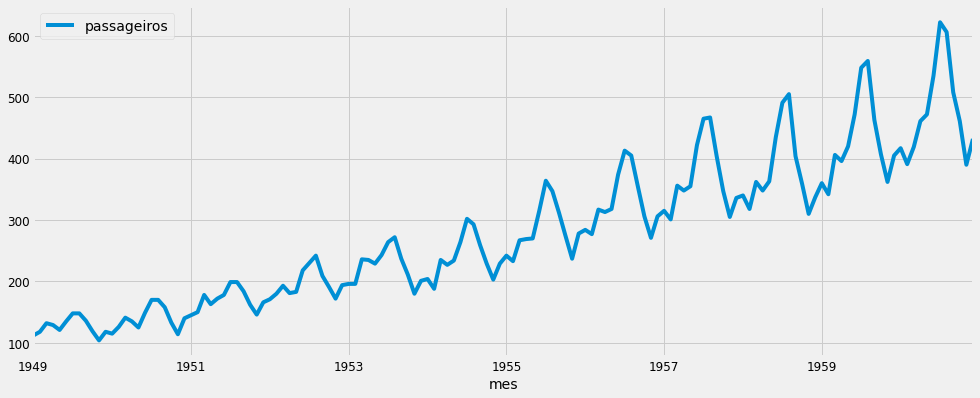

In [0]:
# Plot da série temporal
dados_serie.plot(figsize = (15, 6))
plt.show()

O gráfico acima mostra 2 componentes da série: Sazonalidade e Tendência. 

- Sazonalidade - o fenômeno se repete em períodos fixos.
- Tendência - ao longo do tempo, a série segue uma tendência de crescimento.

Outro aspecto a considerar é o comportamento cíclico. Isso acontece quando o padrão de subida e descida da série não ocorre em intervalos fixos baseados em calendário. Deve-se tomar cuidado para não confundir efeito "cíclico" com efeito "sazonal".

Então, como diferenciar um padrão "cíclico" versus "sazonal"?

Se os padrões não tiverem frequências fixas baseadas em calendário, será cíclico. Porque, diferentemente da sazonalidade, os efeitos cíclicos são tipicamente influenciados pelos negócios e outros fatores socioeconômicos.


Analisar o gráfico da densidade de observações pode fornecer mais informações sobre a estrutura dos dados. Vamos criar o gráfico: 

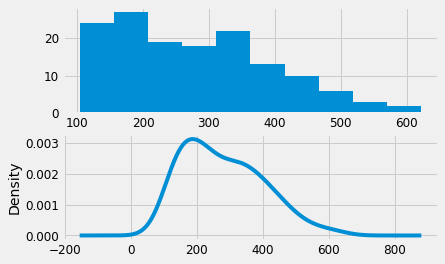

In [0]:
# Gráfico de Densidade

# Plot
plt.figure(1)

# Subplot 1
plt.subplot(211)
dados_serie.passageiros.hist()

# Subplot 2
plt.subplot(212)
dados_serie.passageiros.plot(kind = 'kde')
plt.show()

Análise:
    
- A distribuição não é perfeitamente gaussiana (distribuição normal).
- A distribuição está inclinada para a esquerda.
- As transformações podem ser úteis antes da modelagem.

Vamos agora criar Box Plots para cada ano da série.

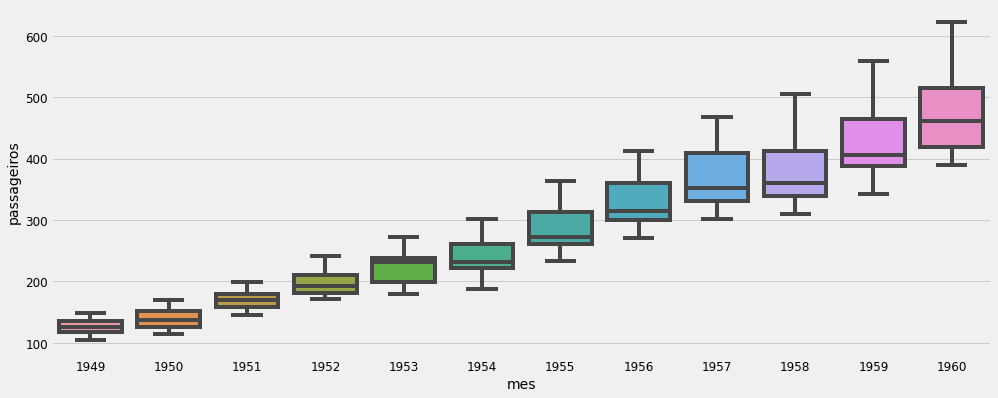

In [0]:
# Define a área de plotagem para os subplots (os boxplots)
fig, ax = plt.subplots(figsize=(15,6))

# Cria um box plot para cada ano usando o Seaborn
# Observe que estamos extraindo o ano (year) do índice da série
sns.boxplot(dados_serie.passageiros.index.year, dados_serie.passageiros, ax = ax)

Análise:

- Valores medianos ao longo dos anos confirmam uma tendência ascendente.
- Aumento constante da dispersão do meio (mediana) dos dados ao longo do tempo. As caixas vão se tornando cada vez maiores.
- Um modelo considerando a sazonalidade pode funcionar bem para prever esta série.

In [0]:
dados_serie.head()

,passageiros
mes,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


Como é uma série temporal mensal e segue um determinado padrão repetitivo todos os anos, você pode plotar cada ano como uma linha separada no mesmo gráfico. Isso permite comparar os padrões do ano lado a lado.

Vamos fazer isso? Então execute a célula abaixo.

Observe que estou usando agora o dataset "dados" e não "dados_serie". Por que? Porque precisamos da data como uma coluna e não como índice, para criar o gráfico abaixo.

In [0]:
# Prepara os dados
x = dados['mes'].values
y1 = dados['passageiros'].values

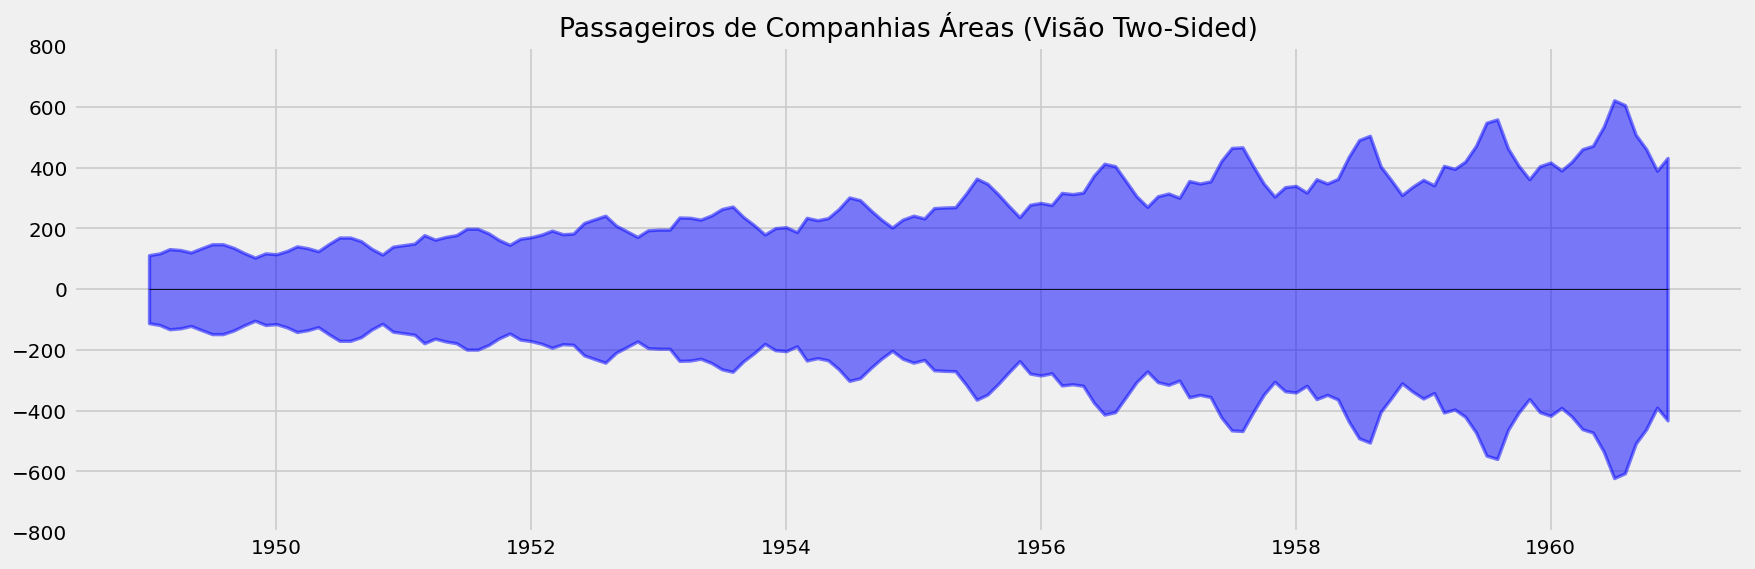

In [0]:
# Plot

# Área de plotagem
fig, ax = plt.subplots(1, 1, figsize = (16,5), dpi = 120)

# Preenchimento do gráfico
plt.fill_between(x, y1 = y1, y2 = -y1, alpha = 0.5, linewidth = 2, color = 'blue')

# Limites do eixo y
plt.ylim(-800, 800)

# Título
plt.title('Passageiros de Companhias Áreas (Visão Two-Sided)', fontsize = 16)

# Limite das linhas
plt.hlines(y = 0, xmin = np.min(dados.mes), xmax = np.max(dados.mes), linewidth = .5)

# Mostra o gráfico
plt.show()

### Séries Temporais Aditivas e Multiplicativas

Dependendo da natureza da tendência e da sazonalidade, uma série temporal pode ser modelada como aditiva ou multiplicativa, em que cada observação na série pode ser expressa como uma soma ou um produto dos componentes:

- Séries temporais aditivas: Valor = Nível Base + Tendência + Sazonalidade + Erro


- Séries temporais multiplicativas: Valor = Nível Base x Tendência x Sazonalidade x Erro

### Descomposição da Série Temporal

- Podemos usar os modelos estatísticos para realizar uma decomposição dessa série cronológica.
- A decomposição de séries temporais é uma tarefa estatística que desconstrói uma série temporal em vários componentes, cada um representando uma das categorias de padrões.
- Com os modelos de estatísticas, poderemos ver a tendência, os componentes sazonais e residuais de nossos dados.

Você pode fazer uma decomposição clássica de uma série temporal, considerando a série como uma combinação aditiva ou multiplicativa do nível base, tendência, índice sazonal e residual.

A função seasonal_decompose do pacote Statsmodels em Python implementa isso convenientemente. Aqui o site do Statsmodels com bastante documentação: https://www.statsmodels.org/

O Statsmodels é estudado nas Formações FCD e FIAMED aqui na DSA. Confira aqui:

https://www.datascienceacademy.com.br/pages/todos-os-cursos-dsa

Vamos então decompor nossa série temporal.

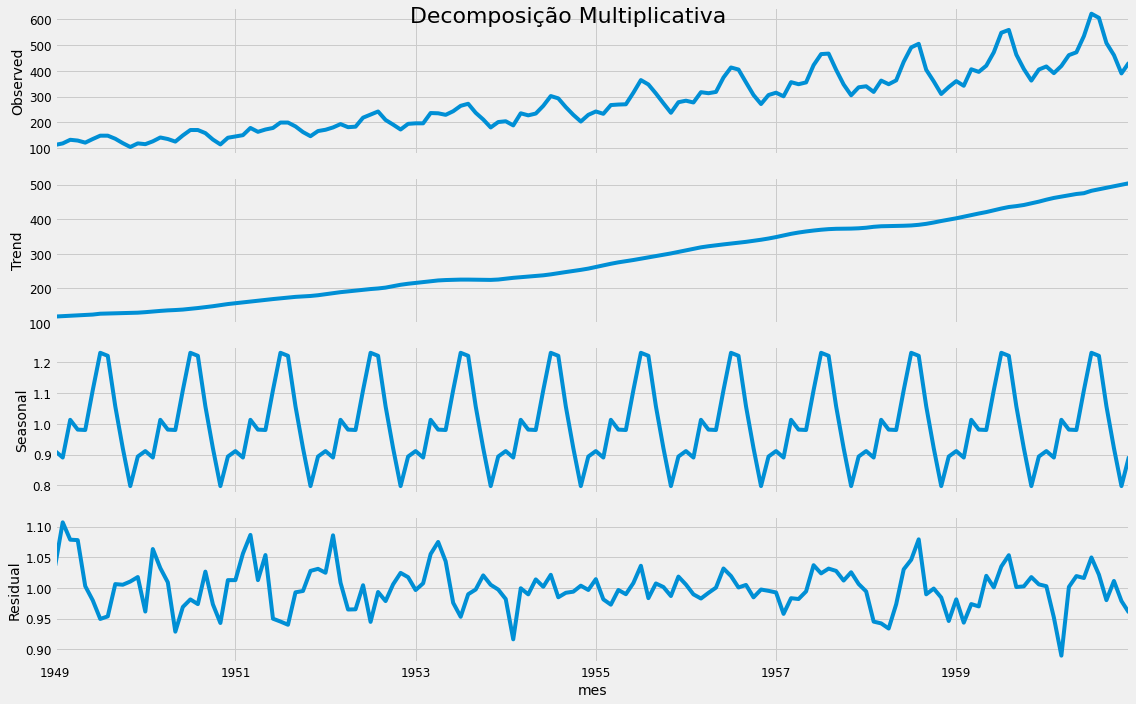

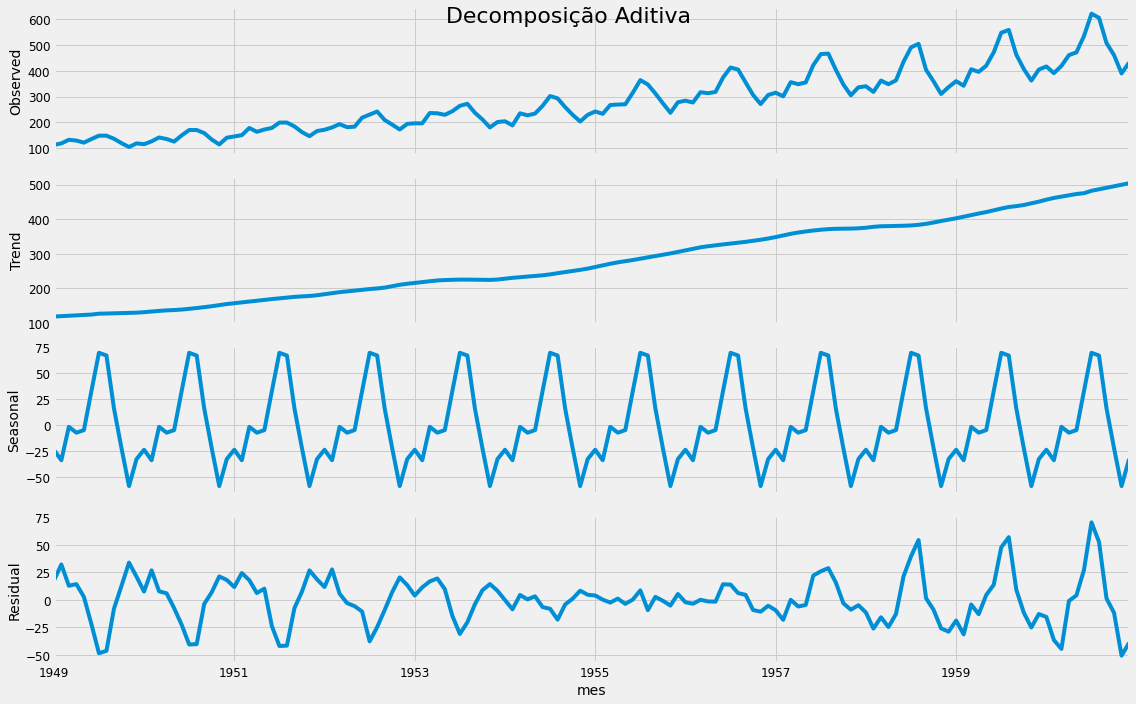

In [0]:
# Multiplicative Decomposition 
decomposicao_multiplicativa = sm.tsa.seasonal_decompose(dados_serie, model = 'multiplicative', 
                                                        extrapolate_trend = 'freq')

# Additive Decomposition
decomposicao_aditiva = sm.tsa.seasonal_decompose(dados_serie, model = 'aditive', 
                                                 extrapolate_trend = 'freq')

# Plot
plt.rcParams.update({'figure.figsize': (16,10)})
decomposicao_multiplicativa.plot().suptitle('Decomposição Multiplicativa', fontsize = 22)
decomposicao_aditiva.plot().suptitle('Decomposição Aditiva', fontsize = 22)
plt.show()

No gráfico acima podemos ver os componentes da série temporal:

1- A primeira linha do gráfico mostra os dados observados, em nosso exemplo o número de passageiros.

2- A segunda linha mostra a tendência do gráfico, que claramente é uma tendência de crescimento, ou seja, o númeto de passageiros tende a crescer ao longo do tempo.

3- A terceira linha mostra a sazonalidade. Claramente temos períodos regulares de aumento e queda, momentos em que temos mais passageiros e momentos com menos passageiros nas viagens aéreas. Isso talvez possa ser explicado pelo aumento das viagens no período de férias, o que se repete ano após ano.

4- A quarta linha é o componete irregular ou resíduo.

Definir extrapolate_trend = 'freq' cuida de todos os valores ausentes na tendência e nos resíduos no início da série (se existirem, claro).

Se você observar atentamente os resíduos da decomposição aditiva, ela permanece com algum padrão. A decomposição multiplicativa, no entanto, parece bastante aleatória, o que é bom. Então, idealmente, a decomposição multiplicativa deve ser preferida para essa série específica.

A saída numérica da tendência, os componentes sazonais e residuais são armazenados na própria saída decomposicao_multiplicativa. Vamos extraí-los e colocá-los em uma tabela de dados.

In [0]:
# Tipo do objeto
type(decomposicao_multiplicativa)

statsmodels.tsa.seasonal.DecomposeResult

In [0]:
# Extrair os componentes
# Valores reais = Produto de (sazonal * tendência * resíduo)

# Concatena o resultado da decomposição da série
dados_serie_reconstruida = pd.concat([decomposicao_multiplicativa.seasonal, 
                                      decomposicao_multiplicativa.trend, 
                                      decomposicao_multiplicativa.resid, 
                                      decomposicao_multiplicativa.observed], axis = 1)

# Define o nome das colunas
dados_serie_reconstruida.columns = ['Sazonalidade', 'Tendência', 'Resíduos', 'Valores_Observados']

# Mostra o resultado
dados_serie_reconstruida.head ()

,Sazonalidade,Tendência,Resíduos,Valores_Observados
mes,,,,
1949-01-01,0.911256,118.588481,1.036418,112
1949-02-01,0.890342,119.734169,1.106896,118
1949-03-01,1.012397,120.879856,1.078621,132
1949-04-01,0.980719,122.025544,1.077940,129
1949-05-01,0.979495,123.171232,1.002938,121


Se você checar, o produto das colunas Sazonalidade, Tendência e Resíduos deve ser exatamente igual a Valores_Observados.

Por exemplo:

- Série na data 1949-01-01 = 112.0
- Série na data 1949-01-01 = Sazonalidade x Tendência x Resíduos = 0.911256 x 118.588481 x 1.036418 = 112.0

In [0]:
# Cálculo em Python
valor_observado = 0.911256 * 118.588481 * 1.036418
print(valor_observado)

111.9999565227569


Ou seja, isso comprova como uma série temporal é na verdade o conjunto de componentes que podem ser extraídos, transformados, analisados e usados para fazer previsões.

# Fim Aula 4